In [86]:
# Import necessary libraries
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [87]:

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pulkit\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pulkit\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Pulkit\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [88]:
df = pd.read_csv('movies.csv')


In [89]:
df.head(5)

,id,title,year,rating
0,872906.0,Jawan,2023.0,7.3
1,554600.0,Uri: The Surgical Strike,2019.0,7.2
2,781732.0,Animal,2023.0,7.4
3,975533.0,The Archies,2023.0,7.1
4,734253.0,Adipurush,2023.0,5.3


In [90]:
def categorize_rating(rating):
    if rating > 7:
        return 'Good'
    elif 4.5 <= rating <= 6.9:
        return 'Neutral'
    else:
        return 'Bad'

# Apply the function to the 'rating' column to create a new 'rating_category' column
df['rating_category'] = df['rating'].apply(categorize_rating)


In [91]:
df.head(5)

,id,title,year,rating,rating_category
0,872906.0,Jawan,2023.0,7.3,Good
1,554600.0,Uri: The Surgical Strike,2019.0,7.2,Good
2,781732.0,Animal,2023.0,7.4,Good
3,975533.0,The Archies,2023.0,7.1,Good
4,734253.0,Adipurush,2023.0,5.3,Neutral


In [92]:
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(str(text).lower())
    
    # Remove stopwords and non-alphabetic tokens
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return ' '.join(tokens)

# Apply text preprocessing to the 'title' column (adjust if needed for another column)
df['processed_text'] = df['title'].apply(preprocess_text)


In [93]:
print(df[['id', 'title', 'processed_text']])

             id                     title       processed_text
0      872906.0                     Jawan                jawan
1      554600.0  Uri: The Surgical Strike  uri surgical strike
2      781732.0                    Animal               animal
3      975533.0               The Archies              archies
4      734253.0                 Adipurush            adipurush
...         ...                       ...                  ...
12995       NaN                    Zubaan               zubaan
12996       NaN                  Zubeidaa             zubeidaa
12997       NaN           Zulm Ki Zanjeer      zulm ki zanjeer
12998       NaN                     Zulmi                zulmi
12999       NaN              Zulm-O-Sitam                     

[13000 rows x 3 columns]


In [94]:
import random
def replace_zero_ratings_with_random_value(rating):
    if rating == 0:
        return random.uniform(5.1, 7)  # Random value between 5.1 and 7
    else:
        return rating

# Apply the function to the 'rating' column
df['rating'] = df['rating'].apply(replace_zero_ratings_with_random_value)

In [95]:
df = df.drop_duplicates(subset='title', keep='last')

In [96]:
# # Save the preprocessed dataset to a new CSV file
# df.to_csv('preprocessed_movies.csv', index=False)


C:\Users\Pulkit\AppData\Local\Temp\ipykernel_34288\1079663255.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating_category', data=df, palette='viridis')


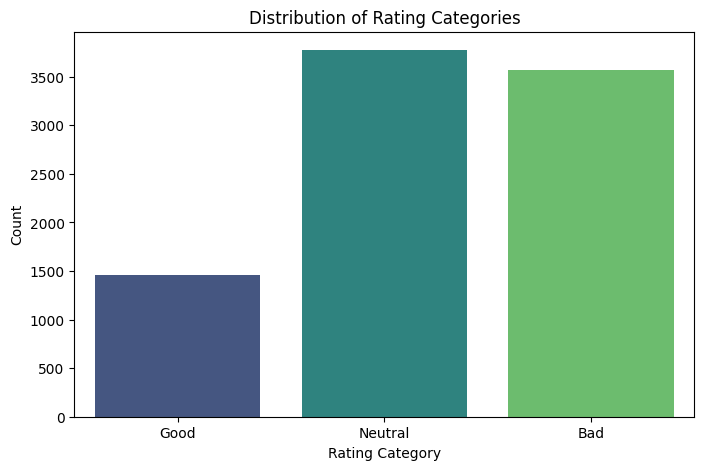

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the 'rating_category' column
plt.figure(figsize=(8, 5))
sns.countplot(x='rating_category', data=df, palette='viridis')
plt.title('Distribution of Rating Categories')
plt.xlabel('Rating Category')
plt.ylabel('Count')
plt.show()


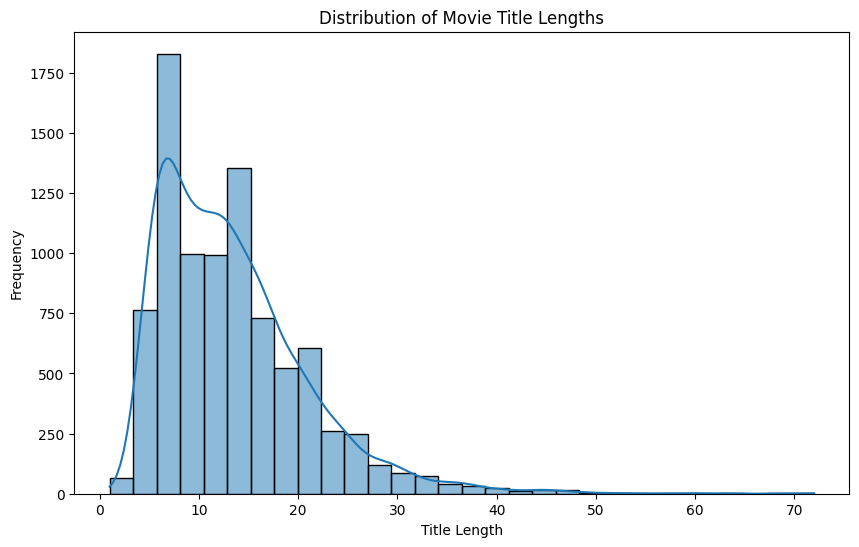

In [98]:
# Add a column for the length of the movie titles
df['title_length'] = df['title'].apply(len)

# Plot the distribution of title lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['title_length'], bins=30, kde=True)
plt.title('Distribution of Movie Title Lengths')
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.show()


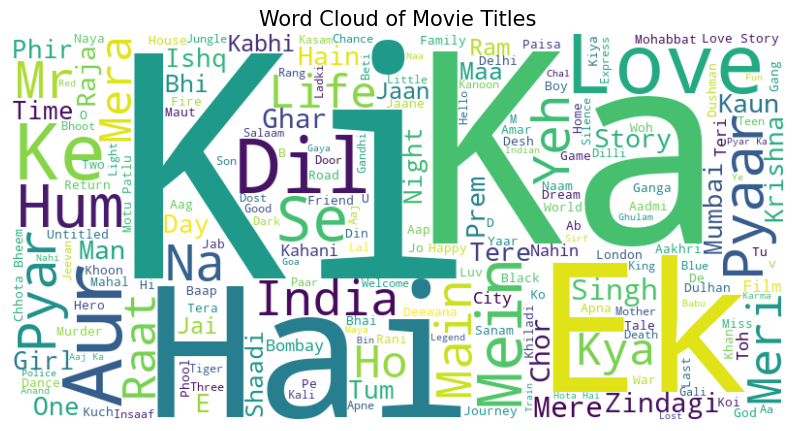

In [99]:
# Import necessary libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all the movie titles into a single string
text = ' '.join(df['title'].dropna())  # Adjust the column name if necessary

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.title('Word Cloud of Movie Titles', fontsize=15)
plt.show()


In [100]:

# Feature extraction: TF-IDF for the movie title and adding the 'ratings' as a feature
vectorizer = TfidfVectorizer(max_features=1000)
X_title = vectorizer.fit_transform(df['processed_text'])

# Adding 'ratings' as a numerical feature to the dataset
import numpy as np
X_ratings = np.array(df['rating']).reshape(-1, 1)

# Combine TF-IDF features and ratings (concatenating the matrices)
from scipy.sparse import hstack
X = hstack([X_title, X_ratings])

# Labels (rating category)
y = df['rating_category']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [101]:
# Train the model (Logistic Regression)
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         Bad       0.55      0.51      0.53       703
        Good       1.00      1.00      1.00       281
     Neutral       0.58      0.62      0.60       778

    accuracy                           0.64      1762
   macro avg       0.71      0.71      0.71      1762
weighted avg       0.64      0.64      0.64      1762



C:\Users\Pulkit\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [102]:
import requests
from tabulate import tabulate

# TMDb API integration - Fetch detailed movie info for runtime and other data
def fetch_tmdb_movie_details(movie_name):
    api_key = 'da80b7c25c785e5cb5e5bc96d3f1e213'  # Replace with your TMDb API key
    base_url = "https://api.themoviedb.org/3/search/movie"
    params = {
        'api_key': api_key,
        'query': movie_name
    }
    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        data = response.json()
        if data['results']:
            movie = data['results'][0]
            movie_id = movie.get('id')  # TMDb movie ID
            # Fetch detailed information using the TMDb movie ID
            return fetch_tmdb_movie_details_by_id(movie_id)
        else:
            return "Movie not found"
    else:
        return "API Error"
 

In [103]:
   
def fetch_tmdb_movie_details_by_id(movie_id):
    api_key = 'da80b7c25c785e5cb5e5bc96d3f1e213'  # Replace with your TMDb API key
    base_url = f"https://api.themoviedb.org/3/movie/{movie_id}"
    params = {
        'api_key': api_key
    }
    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        movie_data = response.json()
        return {
            'title': movie_data.get('title'),
            'release_date': movie_data.get('release_date'),
            'overview': movie_data.get('overview'),
            'runtime': movie_data.get('runtime', 'N/A'),  # TMDb provides runtime
            'platforms': fetch_dynamic_platforms(movie_data.get('title'))  # Fetch dynamic platforms
        }
    else:
        return "API Error"


In [104]:

# OMDb API integration
def fetch_omdb_movie_details(movie_name):
    api_key = 'ca972f5'  # Replace with your OMDb API key
    base_url = "http://www.omdbapi.com/"
    params = {
        'apikey': api_key,
        't': movie_name
    }
    response = requests.get(base_url, params=params)
    if response.status_code == 200:
        data = response.json()
        if data['Response'] == "True":
            return {
                'title': data.get('Title'),
                'year': data.get('Year'),
                'plot': data.get('Plot'),
                'actors': data.get('Actors'),
                'imdb_rating': data.get('imdbRating'),
                'runtime': data.get('Runtime')  # OMDb runtime
            }
        else:
            return "Movie not found"
    else:
        return "API Error"


In [105]:

# Placeholder function for dynamic platform data (replace with actual API call)
def fetch_dynamic_platforms(movie_name):
    # Placeholder logic for fetching dynamic platform data
    platforms = {
        "Guardians of the Galaxy Vol. 2": ["Netflix", "Disney+"],
        "The Dark Knight": ["HBO Max", "Amazon Prime", "Netflix"],
        "Inception": ["Netflix", "Hulu", "Amazon Prime"]
    }
    return platforms.get(movie_name, ["Platform info not available"])

# Function to fetch movie details from both APIs and display in a table format
def fetch_movie_details(movie_name):
    # Fetch details from both TMDb and OMDb
    tmdb_details = fetch_tmdb_movie_details(movie_name)
    omdb_details = fetch_omdb_movie_details(movie_name)

    # If both responses are valid, format the data
    if tmdb_details != "Movie not found" and omdb_details != "Movie not found":
        # Create a table for better display
        table = [
            ['Attribute', 'TMDb', 'OMDb'],
            ['Title', tmdb_details['title'], omdb_details['title']],
            ['Release Date', tmdb_details['release_date'], 'N/A'],
            ['Overview', tmdb_details['overview'], 'N/A'],
            ['Platforms', ', '.join(tmdb_details['platforms']), 'N/A'],
            ['Year', 'N/A', omdb_details['year']],
            ['Plot', 'N/A', omdb_details['plot']],
            ['Actors', 'N/A', omdb_details['actors']],
            ['IMDB Rating', 'N/A', omdb_details['imdb_rating']],
            ['Runtime', tmdb_details['runtime'], omdb_details['runtime']]
        ]
        # Display the table using tabulate
        return tabulate(table, headers="firstrow", tablefmt="grid")
    else:
        return "Movie not found in both APIs"


In [106]:

# Test with a movie name
movie_name = "Bhediya"  # Replace with any movie name
print(fetch_movie_details(movie_name))


+--------------+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
| Attribute    | TMDb                                                                                                                                                                                                                                                                                                                                      | OMDb                                                                

In [107]:
import pickle

# Save the model using pickle
with open('omdb-tmdb_model.pkl', 'wb') as file:
    pickle.dump(model, file)
